## Truc a faire:

- Model de la derniere seance de fouille de données a tester
- Model de clustering a tester
- a voir pour tester des auto encodeur



In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import f1_score
pd.set_option('display.max_columns', None)

In [2]:
PATH = 'data/guillaume.txt'

In [3]:
df=pd.read_csv(PATH,sep=";",decimal=",")

/var/folders/1p/fh_mwjqj47d8zs3rgk2kvbnm0000gn/T/ipykernel_9392/789356330.py:1: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(PATH,sep=";",decimal=",")


In [4]:
df.drop(columns=["CodeDecision","ZIBZIN"],inplace=True)

In [7]:
# df

In [5]:
df.drop(1956360,inplace=True)

In [6]:
df['DateTransaction'] = pd.to_datetime(df['DateTransaction'], yearfirst=True)

# Création de trois nouvelles colonnes : Année, Mois, Jour
df['Année'] = df['DateTransaction'].dt.year
df['Mois'] = df['DateTransaction'].dt.month
df['Jour'] = df['DateTransaction'].dt.day

# Création de trois nouvelles colonnes : Heure, Minute, Seconde
df['Heure'] = df['DateTransaction'].dt.hour
df['Minute'] = df['DateTransaction'].dt.minute
df['Seconde'] = df['DateTransaction'].dt.second

In [7]:
df.iloc[1956360]

IDAvisAutorisationCheque               78643047
FlagImpaye                                    0
Montant                      54,289999999999999
DateTransaction             2017-02-01 07:48:48
VerifianceCPT1                                1
VerifianceCPT2                                1
VerifianceCPT3                                1
D2CB                                        267
ScoringFP1                                    0
ScoringFP2                                    0
ScoringFP3                                    0
TauxImpNb_RB                 110,05692599620494
TauxImpNB_CPM                53,554233554497365
EcartNumCheq                                  0
NbrMagasin3J                                  1
DiffDateTr1                                   4
DiffDateTr2                                   4
DiffDateTr3                                   4
CA3TRetMtt                   54,289999999999999
CA3TR                                         0
Heure                                   

In [8]:
y=df.FlagImpaye

In [9]:
ytmp=y.astype(int)

In [10]:
ytmp.value_counts()

FlagImpaye
0    4616778
1      29995
Name: count, dtype: int64

(array([4616778.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,   29995.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

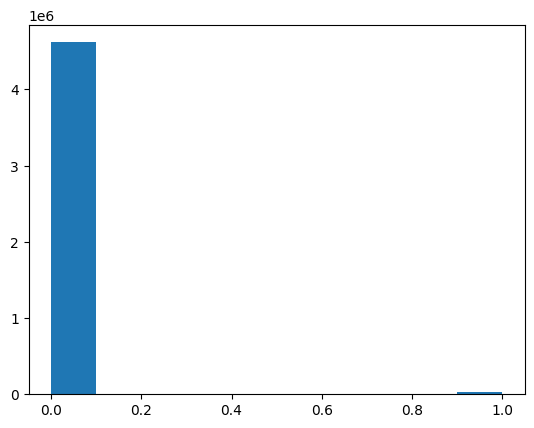

In [11]:
import matplotlib.pyplot as plt
plt.hist(ytmp)

In [12]:
y=y.astype(bool)

In [13]:
df.drop(columns=["FlagImpaye","DateTransaction"],inplace=True)

In [17]:
# df

In [14]:
df["ScoringFP1"]=df["ScoringFP1"].replace(',', '.', regex=True)
df["ScoringFP2"]=df["ScoringFP2"].replace(',', '.', regex=True)
df["ScoringFP3"]=df["ScoringFP3"].replace(',', '.', regex=True)
df["Montant"]=df["Montant"].replace(',', '.', regex=True)
df["TauxImpNb_RB"]=df["TauxImpNb_RB"].replace(',', '.', regex=True)
df["TauxImpNB_CPM"]=df["TauxImpNB_CPM"].replace(',', '.', regex=True)
df["DiffDateTr1"]=df["DiffDateTr1"].replace(',', '.', regex=True)
df["DiffDateTr2"]=df["DiffDateTr2"].replace(',', '.', regex=True)
df["DiffDateTr3"]=df["DiffDateTr3"].replace(',', '.', regex=True)
df["CA3TRetMtt"]=df["CA3TRetMtt"].replace(',', '.', regex=True)
df["CA3TR"]=df["CA3TR"].replace(',', '.', regex=True)

In [15]:
result = df[(df['Mois'] == 9) & (df['Jour'] == 1)]

In [16]:
result


,IDAvisAutorisationCheque,Montant,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Année,Mois,Jour,Minute,Seconde
3899363,83140472,60.0,0,0,0,302,0.0,0.0,0.0,45.368313,52.076034,0,1,4.0,4.0,4.0,60.0,0.0,7,2017,9,1,34,17
3899364,83140475,25.0,0,0,0,547,0.0,0.0,0.0,73.11828,52.076034,0,1,4.0,4.0,4.0,25.0,0.0,8,2017,9,1,6,17
3899365,83140477,32.0,0,0,0,152,0.0,0.0,0.0,45.368313,52.076034,0,1,4.0,4.0,4.0,32.0,0.0,8,2017,9,1,8,3
3899366,83140480,20.88,0,0,0,393,0.00759,0.182221,0.002092,45.14268,34.118277,4,1,0.573461,0.998206,1.539155,92.39,71.51,8,2017,9,1,9,3
3899367,83140481,20.21,0,0,0,152,0.018994,-1.024399,0.005682,45.368313,52.076034,0,1,4.0,4.0,4.0,20.21,0.0,8,2017,9,1,11,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3910725,83168536,62.7,0,0,0,1,62.7,0.105322,0.582942,39.99059,17.579748,0,1,5.0,5.0,5.0,62.7,0.0,21,2017,9,1,53,57
3910726,83168537,278.35,0,0,0,1,8.434848,-0.929372,0.799228,45.368313,52.076034,0,1,5.0,5.0,5.0,278.35,0.0,21,2017,9,1,58,31
3910727,83168538,66.96,0,0,0,1,5.150769,-4.358045,0.777725,35.143209,50.882565,0,1,5.0,5.0,5.0,66.96,0.0,22,2017,9,1,2,36
3910728,83168539,30.35,0,0,0,1,10.116667,0.497221,0.490808,44.642857,37.586887,0,1,5.0,5.0,5.0,30.35,0.0,22,2017,9,1,4,11


In [17]:
tmp=3899363

In [18]:
X_train=df.loc[df.index < tmp]
X_test=df.loc[df.index >= tmp]

y_train=y.loc[y.index < tmp]
y_test=y.loc[y.index >= tmp]

In [23]:
# X_train = train.loc[:, train.columns != 'FlagImpaye']
# y_train= train.loc[:, train.columns == 'FlagImpaye']

# X_test = test.loc[:, test.columns != 'FlagImpaye']
# y_test = test.loc[:, test.columns == 'FlagImpaye']

In [19]:
y_train.value_counts()

FlagImpaye
False    3843313
True       56049
Name: count, dtype: int64

### Sampling

In [25]:
# from imblearn.under_sampling import CondensedNearestNeighbour
# cnn = CondensedNearestNeighbour(sampling_strategy="majority")
# X_res, y_res = cnn.fit_resample(df, y)
# X_res

In [26]:
# df

In [27]:
# result = df[(df['Mois'] == 9) & (df['Jour'] == 1)]

In [28]:
# result

In [20]:
y_train.value_counts()

FlagImpaye
False    3843313
True       56049
Name: count, dtype: int64

In [30]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=1, sampling_strategy= 0.02)
X_train, y_train = sme.fit_resample(X_train, y_train)
X_res# 

,IDAvisAutorisationCheque,Montant,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Année,Mois,Jour,Minute,Seconde
0,78643044.0,20.0,0.0,0.0,0.0,551.0,0.0,0.0,0.0,37.186668,52.076034,0.0,1.0,4.0,4.0,4.0,20.0,0.0,7,2017,2,1,32,14
1,78643046.0,57.64,0.0,0.0,0.0,549.0,0.0,0.0,0.0,73.11828,52.076034,0.0,1.0,4.0,4.0,4.0,57.64,0.0,7,2017,2,1,47,38
2,78643048.0,26.9,0.0,0.0,0.0,549.0,0.003769,8.586333,0.001192,45.368313,52.076034,1.0,1.0,1.997106,4.0,4.0,59.15,32.25,8,2017,2,1,13,27
3,78643049.0,42.51,0.0,0.0,0.0,523.0,0.0,0.0,0.0,24.223058,27.448962,0.0,1.0,4.0,4.0,4.0,42.51,0.0,8,2017,2,1,13,53
4,78643050.0,50.84,0.0,0.0,0.0,551.0,0.006151,12.929167,0.001146,44.775178,52.076034,0.0,1.0,4.0,4.0,4.0,50.84,0.0,8,2017,2,1,18,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794415,80620265.953434,24.419156,0.0,0.0,0.0,548.209313,0.000529,0.477888,0.000118,38.297261,33.569237,0.0,1.0,4.0,4.0,4.0,24.419156,0.0,10,2017,5,5,46,36
3794416,80608009.08177,158.084358,0.0,0.0,0.0,541.134584,0.018997,-1.196201,0.001678,25.063178,22.589443,0.0,1.0,4.0,4.0,4.0,158.084358,0.0,16,2017,5,4,41,9
3794417,80223101.371165,78.27,1.87849,1.87849,2.87849,544.0,0.004796,-24.953633,0.001698,55.675249,36.813027,0.87849,1.0,0.489142,4.0,4.0,147.029388,68.759388,19,2017,4,15,26,31
3794418,80608181.03867,78.271596,0.0,0.0,0.0,538.160222,0.007712,5.853265,0.001298,45.368313,52.076034,0.0,1.0,4.0,4.0,4.0,78.271596,0.0,16,2017,5,4,45,38


In [31]:
# X_res.to_csv("X.csv")
# y_res.to_csv("y.csv")

In [21]:
X_train= pd.read_csv("X.csv")
y_train= pd.read_csv("y.csv")

In [23]:
X_train.drop(columns=["Unnamed: 0"],inplace=True)

In [24]:
y_train.drop(columns=["Unnamed: 0"],inplace=True)

In [32]:
# from imblearn.under_sampling import TomekLinks
# tl = TomekLinks(sampling_strategy="majority")
# X_res, y_res = tl.fit_resample(df, y)
# X_res

In [33]:
# from imblearn.over_sampling import BorderlineSMOTE
# bsm= BorderlineSMOTE(random_state=42, sampling_strategy= 0.01)
# X_res, y_res = bsm.fit_resample(X_res, y_res)
# X_res

In [34]:
# neg, pos = y_res.value_counts()
# pourcentage = pos / neg *100
# pourcentage

In [35]:
# X=pd.read_csv("X.csv")
# y=pd.read_csv("y.csv")

In [36]:
y_res

0          False
1          False
2          False
3          False
4          False
           ...  
3794415     True
3794416     True
3794417     True
3794418     True
3794419     True
Name: FlagImpaye, Length: 3794420, dtype: bool

In [37]:
X_res

,IDAvisAutorisationCheque,Montant,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Année,Mois,Jour,Minute,Seconde
0,78643044.0,20.0,0.0,0.0,0.0,551.0,0.0,0.0,0.0,37.186668,52.076034,0.0,1.0,4.0,4.0,4.0,20.0,0.0,7,2017,2,1,32,14
1,78643046.0,57.64,0.0,0.0,0.0,549.0,0.0,0.0,0.0,73.11828,52.076034,0.0,1.0,4.0,4.0,4.0,57.64,0.0,7,2017,2,1,47,38
2,78643048.0,26.9,0.0,0.0,0.0,549.0,0.003769,8.586333,0.001192,45.368313,52.076034,1.0,1.0,1.997106,4.0,4.0,59.15,32.25,8,2017,2,1,13,27
3,78643049.0,42.51,0.0,0.0,0.0,523.0,0.0,0.0,0.0,24.223058,27.448962,0.0,1.0,4.0,4.0,4.0,42.51,0.0,8,2017,2,1,13,53
4,78643050.0,50.84,0.0,0.0,0.0,551.0,0.006151,12.929167,0.001146,44.775178,52.076034,0.0,1.0,4.0,4.0,4.0,50.84,0.0,8,2017,2,1,18,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794415,80620265.953434,24.419156,0.0,0.0,0.0,548.209313,0.000529,0.477888,0.000118,38.297261,33.569237,0.0,1.0,4.0,4.0,4.0,24.419156,0.0,10,2017,5,5,46,36
3794416,80608009.08177,158.084358,0.0,0.0,0.0,541.134584,0.018997,-1.196201,0.001678,25.063178,22.589443,0.0,1.0,4.0,4.0,4.0,158.084358,0.0,16,2017,5,4,41,9
3794417,80223101.371165,78.27,1.87849,1.87849,2.87849,544.0,0.004796,-24.953633,0.001698,55.675249,36.813027,0.87849,1.0,0.489142,4.0,4.0,147.029388,68.759388,19,2017,4,15,26,31
3794418,80608181.03867,78.271596,0.0,0.0,0.0,538.160222,0.007712,5.853265,0.001298,45.368313,52.076034,0.0,1.0,4.0,4.0,4.0,78.271596,0.0,16,2017,5,4,45,38


In [38]:
# X.drop(columns=["Unnamed: 0"],inplace=True)

In [39]:
# X.to_csv("tmp.csv",sep=";",index=False)

In [40]:
# print(y.value_counts())
# neg, pos = y.value_counts()
# pourcentage = pos / neg *100
# pourcentage

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [4, 8, 10]
}

In [27]:
# X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_leaf=8, min_samples_split=10)

# grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
rf_classifier.fit(X_train, y_train)


predictions = rf_classifier.predict(X_test)

# print(best_params)

accuracy = accuracy_score(y_test, predictions)

print(accuracy)

/Users/adriencastex/Documents/Adrien/Cours/fouille_de_donnees/fouille/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9912069798276986


In [28]:
prediction = rf_classifier.predict(X_test)

# print(best_params)

accuracy = accuracy_score(y_test, predictions)

In [29]:
print(accuracy)

0.9912069798276986


In [30]:
f1_score(y_test,prediction)

0.000304228780042592

In [31]:
# X_res.to_csv("X.csv")
# y_res.to_csv("y.csv")

## Arbre de decision

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(decision_tree_classifier, param_grid, cv=5, scoring='f1')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_decision_tree_classifier = grid_search.best_estimator_

predictions = best_decision_tree_classifier.predict(X_test)

accuracy_score(predictions,y_test)


0.9912056418757551

In [33]:
print(best_params)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [34]:
f1_score(y_test,predictions)

0.0015190642564180464

## Deep learning

In [35]:
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers import Dropout, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.initializers import Constant

from tensorflow import keras

import tensorflow as tf

2024-01-23 22:43:38.915606: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/adriencastex/Documents/Adrien/Cours/fouille_de_donnees/fouille/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [36]:
neg, pos = np.bincount(y)

In [37]:
# X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [38]:
X_train.columns

Index(['IDAvisAutorisationCheque', 'Montant', 'VerifianceCPT1',
       'VerifianceCPT2', 'VerifianceCPT3', 'D2CB', 'ScoringFP1', 'ScoringFP2',
       'ScoringFP3', 'TauxImpNb_RB', 'TauxImpNB_CPM', 'EcartNumCheq',
       'NbrMagasin3J', 'DiffDateTr1', 'DiffDateTr2', 'DiffDateTr3',
       'CA3TRetMtt', 'CA3TR', 'Heure', 'Année', 'Mois', 'Jour', 'Minute',
       'Seconde'],
      dtype='object')

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Centrer et réduire les colonnes du DataFrame
X_train = pd.DataFrame(scaler.fit_transform(X_train))

In [40]:
output_bias=np.log([pos/neg])

In [41]:
output_bias

array([-4.29324354])

In [42]:
# A modif ça marche pas
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
      keras.metrics.F1Score(name="f1_score") #Erreur ici
]

In [43]:
output_bias = tf.keras.initializers.Constant(output_bias)

In [44]:
output_bias

In [45]:
inputs=Input((X_train.shape[1]))


d1 = Dense(16, activation='relu')(inputs)
d1 = Dropout(0.3)(d1)

outputs=Dense(1, activation='sigmoid', bias_initializer=output_bias)(d1)

model = Model(inputs=[inputs], outputs=[outputs])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense (Dense)               (None, 16)                400       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 417 (1.63 KB)
Trainable params: 417 (1.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
X_train=X_train.astype("float32")
y_train=y_train.astype("int16")

In [47]:
y_train.shape

(3794420, 1)

In [48]:
filepath = "model.h5"

earlystopper = EarlyStopping(patience=5, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min')

callbacks_list = [earlystopper, checkpoint]

history = model.fit(X_train, y_train, validation_split=0.1, batch_size=200, epochs=800, callbacks=callbacks_list)

Epoch 1/800
17060/17075 [============================>.] - ETA: 0s - loss: 1.5336e-04 - accuracy: 1.0000
Epoch 1: val_loss improved from inf to 1.89198, saving model to model.h5
17075/17075 [==============================] - 35s 2ms/step - loss: 1.5322e-04 - accuracy: 1.0000 - val_loss: 1.8920 - val_accuracy: 0.9422
Epoch 2/800
   54/17075 [..............................] - ETA: 32s - loss: 4.5560e-08 - accuracy: 1.0000

/Users/adriencastex/Documents/Adrien/Cours/fouille_de_donnees/fouille/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17075/17075 [==============================] - ETA: 0s - loss: 8.6457e-08 - accuracy: 1.0000
Epoch 2: val_loss did not improve from 1.89198
17075/17075 [==============================] - 33s 2ms/step - loss: 8.6457e-08 - accuracy: 1.0000 - val_loss: 2.6387 - val_accuracy: 0.9422
Epoch 3/800
17054/17075 [============================>.] - ETA: 0s - loss: 1.6802e-08 - accuracy: 1.0000
Epoch 3: val_loss did not improve from 1.89198
17075/17075 [==============================] - 33s 2ms/step - loss: 1.6788e-08 - accuracy: 1.0000 - val_loss: 2.8559 - val_accuracy: 0.9422
Epoch 4/800
17071/17075 [============================>.] - ETA: 0s - loss: 6.8794e-09 - accuracy: 1.0000
Epoch 4: val_loss did not improve from 1.89198
17075/17075 [==============================] - 32s 2ms/step - loss: 6.8778e-09 - accuracy: 1.0000 - val_loss: 2.9562 - val_accuracy: 0.9422
Epoch 5/800
17066/17075 [============================>.] - ETA: 0s - loss: 3.8158e-09 - accuracy: 1.0000
Epoch 5: val_loss did not impro

In [49]:
# use the best epoch
model.load_weights('model.h5')

In [50]:
X_test.dtypes

IDAvisAutorisationCheque    object
Montant                     object
VerifianceCPT1              object
VerifianceCPT2              object
VerifianceCPT3              object
D2CB                        object
ScoringFP1                  object
ScoringFP2                  object
ScoringFP3                  object
TauxImpNb_RB                object
TauxImpNB_CPM               object
EcartNumCheq                object
NbrMagasin3J                object
DiffDateTr1                 object
DiffDateTr2                 object
DiffDateTr3                 object
CA3TRetMtt                  object
CA3TR                       object
Heure                        int32
Année                        int32
Mois                         int32
Jour                         int32
Minute                       int32
Seconde                      int32
dtype: object

In [51]:
X_test = X_test.astype(float)

In [52]:
X_test

,IDAvisAutorisationCheque,Montant,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Année,Mois,Jour,Minute,Seconde
3899363,83140472.0,60.00,0.0,0.0,0.0,302.0,0.000000,0.000000,0.000000,45.368313,52.076034,0.0,1.0,4.000000,4.000000,4.000000,60.00,0.00,7.0,2017.0,9.0,1.0,34.0,17.0
3899364,83140475.0,25.00,0.0,0.0,0.0,547.0,0.000000,0.000000,0.000000,73.118280,52.076034,0.0,1.0,4.000000,4.000000,4.000000,25.00,0.00,8.0,2017.0,9.0,1.0,6.0,17.0
3899365,83140477.0,32.00,0.0,0.0,0.0,152.0,0.000000,0.000000,0.000000,45.368313,52.076034,0.0,1.0,4.000000,4.000000,4.000000,32.00,0.00,8.0,2017.0,9.0,1.0,8.0,3.0
3899366,83140480.0,20.88,0.0,0.0,0.0,393.0,0.007590,0.182221,0.002092,45.142680,34.118277,4.0,1.0,0.573461,0.998206,1.539155,92.39,71.51,8.0,2017.0,9.0,1.0,9.0,3.0
3899367,83140481.0,20.21,0.0,0.0,0.0,152.0,0.018994,-1.024399,0.005682,45.368313,52.076034,0.0,1.0,4.000000,4.000000,4.000000,20.21,0.00,8.0,2017.0,9.0,1.0,11.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4646769,84966399.0,23.94,0.0,0.0,0.0,1.0,4.788000,-22.542614,1.970346,42.072631,43.030421,0.0,1.0,5.000000,5.000000,5.000000,23.94,0.00,21.0,2017.0,11.0,30.0,20.0,15.0
4646770,84966400.0,92.60,0.0,0.0,0.0,514.0,0.060052,-2.236379,0.003084,167.130919,36.813027,1.0,2.0,1.035949,4.000000,4.000000,262.45,169.85,21.0,2017.0,11.0,30.0,22.0,49.0
4646771,84966401.0,69.00,0.0,0.0,0.0,1.0,3.631579,-1.062954,0.790971,72.607261,52.076034,0.0,1.0,5.000000,5.000000,5.000000,69.00,0.00,21.0,2017.0,11.0,30.0,24.0,37.0
4646772,84966402.0,57.80,0.0,0.0,0.0,1.0,28.900000,0.567666,0.581925,31.880978,82.051282,0.0,1.0,5.000000,5.000000,5.000000,57.80,0.00,21.0,2017.0,11.0,30.0,57.0,32.0


In [53]:
test_preds = model.predict(X_test)

23357/23357 [==============================] - 27s 1ms/step


In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(test_preds,y_test)

0.9912056418757551

In [55]:
from sklearn.metrics import f1_score

In [56]:
f1_score(y_test,test_preds)

0.0

In [57]:
tst=test_preds[:,0].astype(bool)

In [58]:
tst=tst.tolist()

In [64]:
f1_score(y_test,tst)

0.0

## Custom loss fonction

In [101]:
def EtudeGainPerte(X_test, y_test, y_pred):
    
    poids = 0.05
    
    tab = []
    
    # Passage des y en liste
    y_test=list(y_test)
    y_pred=list(y_pred)

    for i in range(len(X_test)):
        TN=0
        FP=0
        FN=0
        TP=0
        
        M = X_test.iloc[i]['Montant']
        
        if (y_test[i]==0 & y_pred[i]==0):
            TN = 0.05 * M
        elif(y_test[i]==0 & y_pred[i]==1):
            FP = 0.70 * M * 0.05
        elif(y_test[i]==1 & y_pred[i]==1):
            TP = poids * M 
        else:        
            if M <= 20:
                FN = 0
            elif M <= 50:
                FN = 0.2 * M
            elif M <= 100:
                FN = 0.3 * M
            elif M <= 200:
                FN = 0.5 * M
            else:
                FN = 0.8 * M
        rt = TN + FP - FN + TP
        
        
        tab.append(rt)
    return tab
        

In [139]:
def fonction_perte(X_test, mod=None):
    
    poids = 0
    
    ### 1 Fraude O Pas fraude 
    
    
    pp=mod.predict_proba(X_test)

    tab = []
    pred=0
    
    for i in range(len(X_test)):
      
        predict_prob0 = pp[i,0]
        predict_prob1 = pp[i,1]


        M = X_test.iloc[i]['Montant']
        ### ++++++ Marge
        TN = 0.05 * M * predict_prob0
        FP = 0.70 * M * 0.05 *predict_prob1

        if M <= 20:
            FN = 0
        elif M <= 50:
            FN = 0.2 * M
        elif M <= 100:
            FN = 0.3 * M
        elif M <= 200:
            FN = 0.5 * M
        else:
            FN = 0.8 * M
        
        TP = predict_prob1 * poids * M 
        
        rt = TN + FP - FN + TP
        
        if(rt <= 0):
            pred = 1
        else:
            pred = 0
        
        tab.append([rt, pred])
        
        
    return tab

In [113]:
tmp=best_decision_tree_classifier.predict_proba(X_test)

In [69]:
tmp.shape

(747411, 2)

In [114]:
tmp[:,1]

array([0.        , 0.        , 0.        , ..., 0.00050864, 0.00050864,
       0.00288288])

In [83]:
X_test.iloc[2]['Montant']

32.0

In [102]:
# etude perte arbre de decision
tmp=EtudeGainPerte(X_test,y_test,predictions)

oui


In [105]:
sum(tmp)

1943459.555000306

In [106]:
# etude perte arbre de decision
tmp=EtudeGainPerte(X_test,y_test,prediction)

oui


In [107]:
sum(tmp)

1941884.8850002985

In [108]:
valeurs_negatives = [x for x in tmp if x < 0]
valeurs_negatives

[-26.4,
 -28.313999999999997,
 -10.0,
 -27.029999999999998,
 -8.004000000000001,
 -64.335,
 -21.488999999999997,
 -53.865,
 -21.009,
 -10.0,
 -9.65,
 -8.0,
 -9.258000000000001,
 -9.208,
 -264.112,
 -25.364999999999995,
 -239.20000000000002,
 -191.52,
 -18.483,
 -22.331999999999997,
 -16.02,
 -63.06,
 -70.615,
 -8.426,
 -20.583,
 -5.0,
 -6.728000000000001,
 -9.0,
 -29.198999999999998,
 -22.644000000000002,
 -53.98,
 -19.74,
 -18.264,
 -24.099,
 -16.974,
 -73.64,
 -21.599999999999998,
 -16.647,
 -16.239,
 -5.088000000000001,
 -9.120000000000001,
 -82.635,
 -7.942,
 -26.718,
 -6.562000000000001,
 -6.2,
 -93.47,
 -16.656,
 -16.656,
 -51.02,
 -84.5,
 -25.044,
 -5.806000000000001,
 -17.4,
 -400.0,
 -4.44,
 -100.0,
 -28.470000000000002,
 -5.0,
 -5.188000000000001,
 -9.25,
 -27.206999999999997,
 -27.3,
 -281.44,
 -27.168,
 -6.002000000000001,
 -58.54,
 -9.756,
 -21.506999999999998,
 -95.545,
 -5.25,
 -7.418000000000001,
 -91.7,
 -17.474999999999998,
 -283.728,
 -176.328,
 -15.696,
 -23.3040000

In [140]:
tmp=fonction_perte(X_test,best_decision_tree_classifier)

In [141]:
tmp

[[-15.0, 1],
 [-3.75, 1],
 [-4.800000000000001, 1],
 [-3.132, 1],
 [-3.0315000000000003, 1],
 [1.0, 0],
 [0.3125, 0],
 [-24.937499999999996, 1],
 [-6.75, 1],
 [0.529, 0],
 [-5.088000000000001, 1],
 [-5.862, 1],
 [-4.671, 1],
 [-15.0, 1],
 [-17.6275, 1],
 [-4.5, 1],
 [-6.75, 1],
 [-3.0015000000000005, 1],
 [-61.204499999999996, 1],
 [0.7365, 0],
 [-21.1975, 1],
 [0.41300000000000003, 0],
 [0.71, 0],
 [-17.66, 1],
 [-4.846500000000001, 1],
 [-4.5015, 1],
 [0.763, 0],
 [0.58, 0],
 [-5.2515, 1],
 [-4.5015, 1],
 [-4.506, 1],
 [-6.031499999999999, 1],
 [0.9815, 0],
 [-49.5, 1],
 [-4.5, 1],
 [-4.9575, 1],
 [-7.5, 1],
 [-3.7095000000000002, 1],
 [-150.8640007460831, 1],
 [-5.484000000000001, 1],
 [-4.6215, 1],
 [-12.974999999999998, 1],
 [-5.6205, 1],
 [-4.521000000000001, 1],
 [0.5955, 0],
 [-3.9105000000000003, 1],
 [-6.6915000000000004, 1],
 [-61.964999999999996, 1],
 [-3.0225, 1],
 [-3.798, 1],
 [-3.6000000000000005, 1],
 [-7.219500000000001, 1],
 [0.5215, 0],
 [-15.274999999999999, 1],
 [

In [143]:
tmp=np.array(tmp)

In [144]:
tmp.shape

(747411, 2)

In [146]:
np.count_nonzero(tmp[:, 1] > 0)

629437